In [8]:
import pandas as pd
import numpy as np
import itertools
import xarray as xr
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
Y = np.load(r"/home/uditbhatia/Documents/Sarth/Downscaling_AugmentedConvLSTM/03_Preprocess_Data/Stacked/Y.npy").reshape(-1,129,135)
Y_360 = np.load(r"/home/uditbhatia/Documents/Sarth/Downscaling_AugmentedConvLSTM/03_Preprocess_Data/Stacked/Y_360.npy").reshape(-1,129,135)
Y_mon = np.load(r"/home/uditbhatia/Documents/Sarth/Downscaling_AugmentedConvLSTM/03_Preprocess_Data/Stacked/Y_mon.npy").reshape(-1,129,135)
Y_mon_temp = np.load(r"/home/uditbhatia/Documents/Sarth/Downscaling_AugmentedConvLSTM/03_Preprocess_Data/Stacked/Y_mon_temp.npy").reshape(-1,129,135)

In [3]:
print(Y.shape, Y_360.shape, Y_mon.shape, Y_mon_temp.shape)

(21170, 129, 135) (20734, 129, 135) (696, 129, 135) (696, 129, 135)


In [4]:
print(Y.std(), Y_360.std(), Y_mon.std(), Y_mon_temp.std())

5.908736811650466 5.919076460846521 37.17694297061841 6.952392465798967


In [5]:
print(Y.mean(), Y_360.mean(), Y_mon.mean(), Y_mon_temp.mean())

0.8937610799332989 0.8960925733145586 14.309589316472854 2.5495193302576267


In [6]:
del Y, Y_360, Y_mon, Y_mon_temp

In [7]:
Y_hat = np.load(r"/home/uditbhatia/Documents/Sarth/Downscaling_AugmentedConvLSTM/04_Testing_Stacks/npy_Files/yy_hat_MIROC-ESM.npy").reshape(-1,129,135)
Y = np.load(r"/home/uditbhatia/Documents/Sarth/Downscaling_AugmentedConvLSTM/03_Preprocess_Data/Stacked/Y.npy").reshape(-1,129,135)[4:]
print(f"Y: {Y.shape}; Y_hat: {Y_hat.shape}")

Y: (21166, 129, 135); Y_hat: (21166, 129, 135)


In [19]:
print(Y.mean(), Y.std())
print(Y_hat.mean(), Y_hat.std())

0.8938756986074756 5.909183647118061
0.3701965 1.3832935


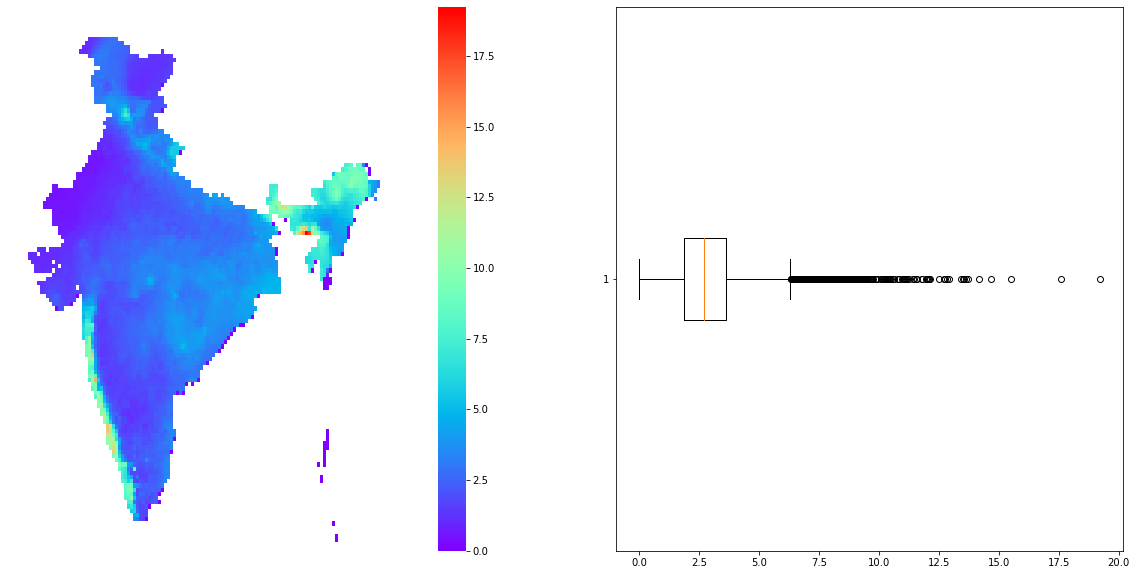

In [12]:
data = np.array(np.mean(Y, axis = 0))
FileName = r"/home/uditbhatia/Documents/Sarth/Downscaling_AugmentedConvLSTM/03_Preprocess_Data/npy_Files/SRTM.npy"
mask = np.load(FileName)
indices = np.where(mask == 0)
data[indices] = np.nan
fig,ax = plt.subplots(1,2, figsize = (20,10))
sns.heatmap(np.flip(data, axis = 0), cmap = 'rainbow', ax =ax[0])
ax[0].axis('off')
ax[1].boxplot(data[~np.isnan(data)], vert = False)
plt.show()

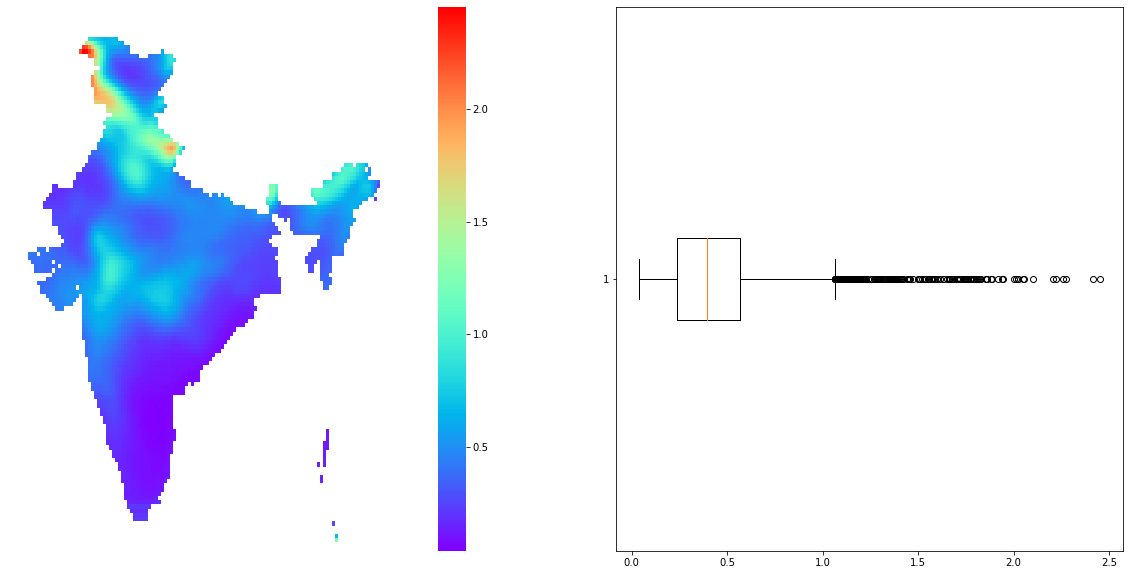

In [13]:
data = np.array(np.mean(Y_hat, axis = 0))
FileName = r"/home/uditbhatia/Documents/Sarth/Downscaling_AugmentedConvLSTM/03_Preprocess_Data/npy_Files/SRTM.npy"
mask = np.load(FileName)
indices = np.where(mask == 0)
data[indices] = np.nan
fig,ax = plt.subplots(1,2, figsize = (20,10))
sns.heatmap(np.flip(data, axis = 0), cmap = 'rainbow', ax =ax[0])
ax[0].axis('off')
ax[1].boxplot(data[~np.isnan(data)], vert = False)
plt.show()

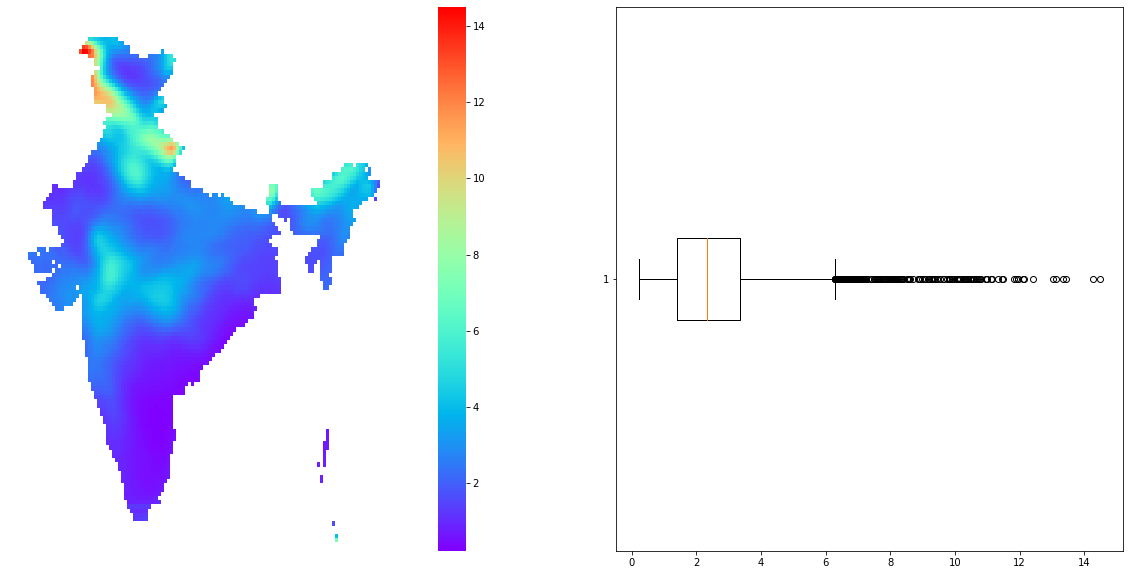

In [14]:
data = np.array(np.mean(Y_hat*Y.std(), axis = 0))
FileName = r"/home/uditbhatia/Documents/Sarth/Downscaling_AugmentedConvLSTM/03_Preprocess_Data/npy_Files/SRTM.npy"
mask = np.load(FileName)
indices = np.where(mask == 0)
data[indices] = np.nan
fig,ax = plt.subplots(1,2, figsize = (20,10))
sns.heatmap(np.flip(data, axis = 0), cmap = 'rainbow', ax =ax[0])
ax[0].axis('off')
ax[1].boxplot(data[~np.isnan(data)], vert = False)
plt.show()

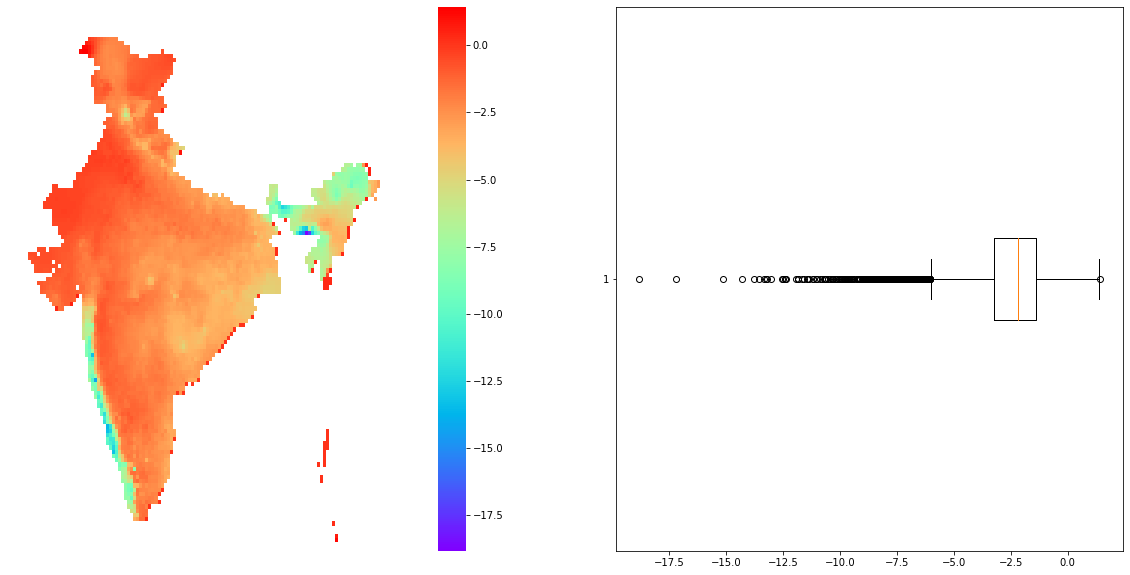

In [10]:
Y_diff = np.mean(Y_hat - Y, axis = 0)

data = np.array(Y_diff)
FileName = r"/home/uditbhatia/Documents/Sarth/Downscaling_AugmentedConvLSTM/03_Preprocess_Data/npy_Files/SRTM.npy"
mask = np.load(FileName)
indices = np.where(mask == 0)
data[indices] = np.nan
fig,ax = plt.subplots(1,2, figsize = (20,10))
sns.heatmap(np.flip(data, axis = 0), cmap = 'rainbow', ax =ax[0])
ax[0].axis('off')
ax[1].boxplot(data[~np.isnan(data)], vert = False)
plt.show()

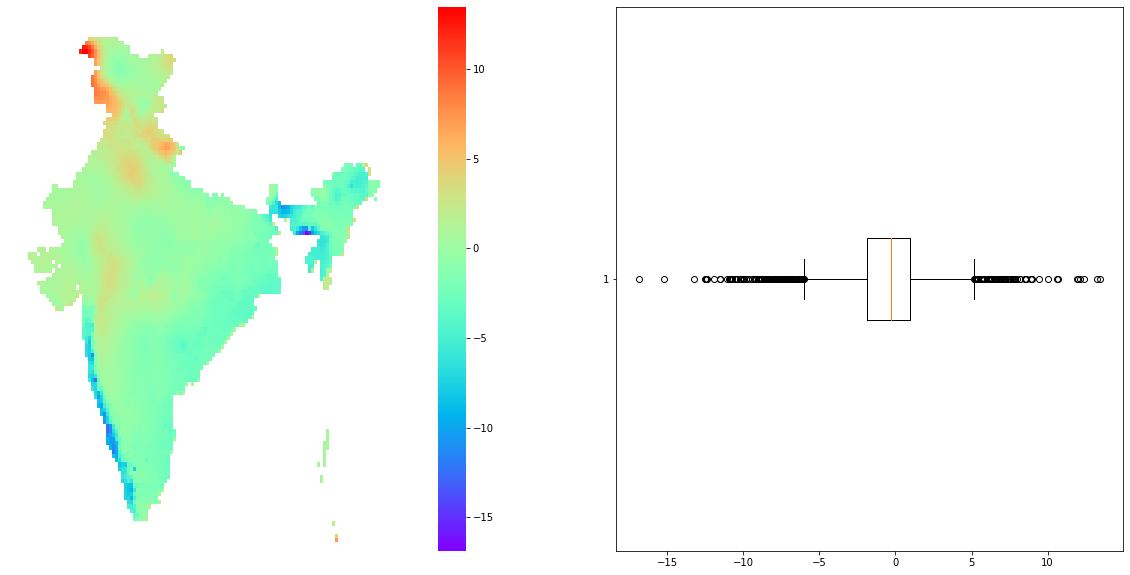

In [15]:
data = np.array(np.mean(Y_hat*Y.std() - Y, axis = 0))
FileName = r"/home/uditbhatia/Documents/Sarth/Downscaling_AugmentedConvLSTM/03_Preprocess_Data/npy_Files/SRTM.npy"
mask = np.load(FileName)
indices = np.where(mask == 0)
data[indices] = np.nan
fig,ax = plt.subplots(1,2, figsize = (20,10))
sns.heatmap(np.flip(data, axis = 0), cmap = 'rainbow', ax =ax[0])
ax[0].axis('off')
ax[1].boxplot(data[~np.isnan(data)], vert = False)
plt.show()

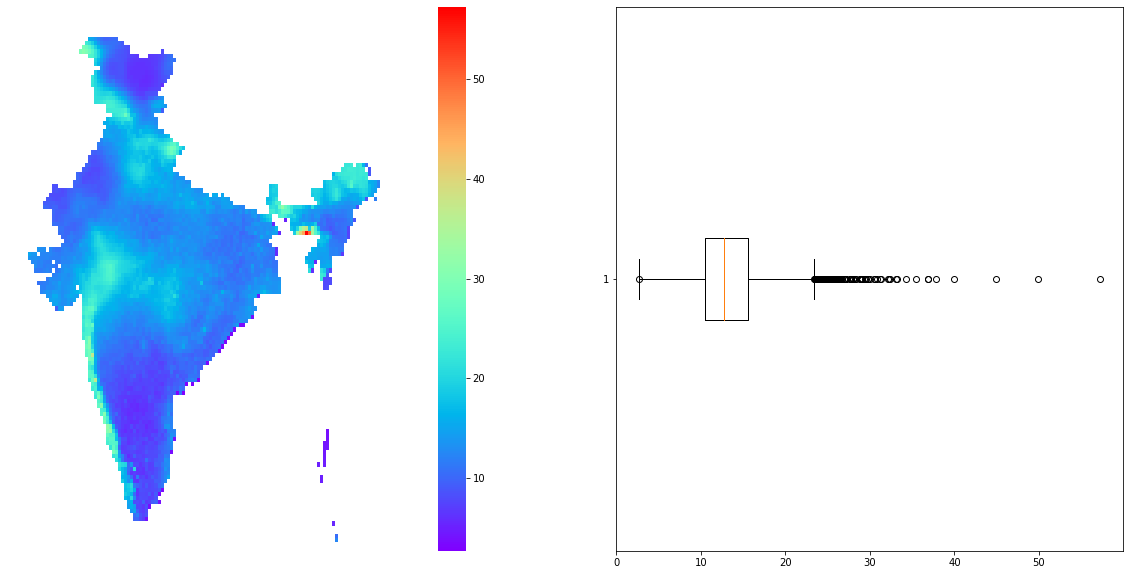

In [18]:
data = np.array(np.sqrt(np.sum(np.square(((Y_hat*Y.std())+Y.mean()) - Y), axis = 0)/21166))
FileName = r"/home/uditbhatia/Documents/Sarth/Downscaling_AugmentedConvLSTM/03_Preprocess_Data/npy_Files/SRTM.npy"
mask = np.load(FileName)
indices = np.where(mask == 0)
data[indices] = np.nan
fig,ax = plt.subplots(1,2, figsize = (20,10))
sns.heatmap(np.flip(data, axis = 0), cmap = 'rainbow', ax =ax[0])
ax[0].axis('off')
ax[1].boxplot(data[~np.isnan(data)], vert = False)
plt.show()

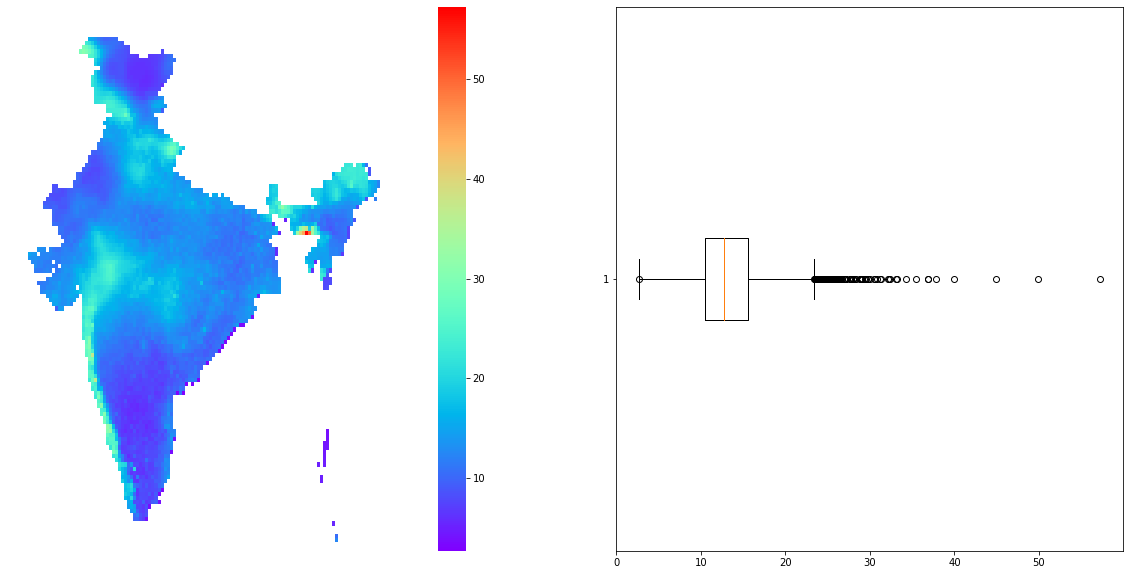

In [23]:
YY = Y.mean() + ((Y-Y.mean()).std())*Y_hat
data = np.array(np.sqrt(np.sum(np.square(YY - Y), axis = 0)/21166))
# data = np.array(np.mean(YY - Y_hat, axis = 0))
FileName = r"/home/uditbhatia/Documents/Sarth/Downscaling_AugmentedConvLSTM/03_Preprocess_Data/npy_Files/SRTM.npy"
mask = np.load(FileName)
indices = np.where(mask == 0)
data[indices] = np.nan
fig,ax = plt.subplots(1,2, figsize = (20,10))
sns.heatmap(np.flip(data, axis = 0), cmap = 'rainbow', ax =ax[0])
ax[0].axis('off')
ax[1].boxplot(data[~np.isnan(data)], vert = False)
plt.show()

In [26]:
Y_obs = np.load(r"/home/uditbhatia/Documents/Sarth/Downscaling_AugmentedConvLSTM/03_Preprocess_Data/npy_Files/MIROC-ESM.npy")
print(Y_obs.shape)
print(Y_obs.mean(), Y_obs.std())

(21170, 129, 135)
4.2406795e-05 7.3909694e-05


In [1]:
import pandas as pd
import numpy as np
import itertools
import xarray as xr

In [3]:
dr = pd.date_range(start = '1948-01-05', end = '2005-12-31' ) # 21185
print(f"Number of days in the date range: {len(dr)}")
dr = dr[(dr.day != 29) | (dr.month != 2)] # 21170
print(f"Number of days excluding leap days: {len(dr)}")

Number of days in the date range: 21181
Number of days excluding leap days: 21166
